<a href="https://colab.research.google.com/github/OrlandoBolivar/ClassificationModel-Cellphone/blob/main/Cellphone%7CAss2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/
%cd MyDrive/

Mounted at /content/gdrive
/content/gdrive
/content/gdrive/MyDrive


In [2]:
import pandas as pd
df= pd.read_csv('Assessment _2a_Cellphone-1.csv')
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [5]:
df.describe ()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


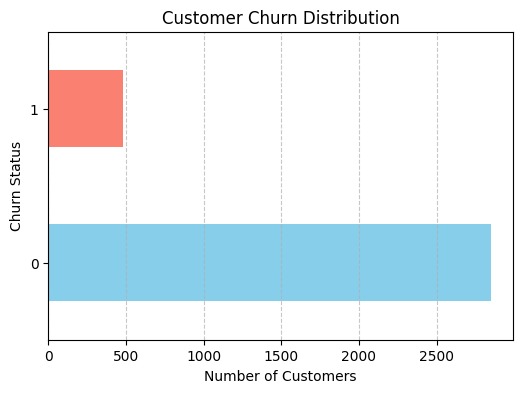

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
file_path = "/content/gdrive/MyDrive/Assessment _2a_Cellphone-1.csv"
df = pd.read_csv(file_path)

plt.figure(figsize=(6, 4))
df["Churn"].value_counts().plot(kind="barh", color=["skyblue", "salmon"])
plt.xlabel("Number of Customers")
plt.ylabel("Churn Status")
plt.title("Customer Churn Distribution")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [9]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve
import numpy as np

df_feature = df.drop(['Churn'], axis=1)
df_feature.head()
df_feature.describe()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [10]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AccountWeeks     3333 non-null   int64  
 1   ContractRenewal  3333 non-null   int64  
 2   DataPlan         3333 non-null   int64  
 3   DataUsage        3333 non-null   float64
 4   CustServCalls    3333 non-null   int64  
 5   DayMins          3333 non-null   float64
 6   DayCalls         3333 non-null   int64  
 7   MonthlyCharge    3333 non-null   float64
 8   OverageFee       3333 non-null   float64
 9   RoamMins         3333 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 260.5 KB


In [11]:
df_label = df['Churn']
df_label.head()

,Churn
0,0
1,0
2,0
3,0
4,0


In [12]:
df_label.describe()

,Churn
count,3333.000000
mean,0.144914
std,0.352067
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [13]:
X_train, X_test, y_train, y_test = train_test_split(df_feature, df_label, test_size=0.3)

In [17]:
model = RandomForestClassifier()
# fit the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy * 100)
print(classification_report(y_test,y_pred))

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

93.7
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       848
           1       0.86      0.70      0.77       152

    accuracy                           0.94      1000
   macro avg       0.90      0.84      0.87      1000
weighted avg       0.93      0.94      0.93      1000

Feature: 0, Score: 0.06601
Feature: 1, Score: 0.07112
Feature: 2, Score: 0.03210
Feature: 3, Score: 0.07239
Feature: 4, Score: 0.13587
Feature: 5, Score: 0.18043
Feature: 6, Score: 0.06853
Feature: 7, Score: 0.18972
Feature: 8, Score: 0.09721
Feature: 9, Score: 0.08661


In [18]:
model = KNeighborsClassifier(n_neighbors=5)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

# Compute feature importance using permutation importance
result = permutation_importance(model, X_test, y_test, scoring='accuracy')

# Extract importance scores
importance = result.importances_mean

# Summarize feature importance
for i, v in enumerate(importance):
    print(f'Feature: {i}, Score: {v:.5f}')


Accuracy: 86.30%
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       848
           1       0.61      0.28      0.39       152

    accuracy                           0.86      1000
   macro avg       0.74      0.62      0.65      1000
weighted avg       0.84      0.86      0.84      1000

Feature: 0, Score: -0.00060
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: -0.00060
Feature: 5, Score: 0.05420
Feature: 6, Score: 0.00300
Feature: 7, Score: 0.01340
Feature: 8, Score: 0.00040
Feature: 9, Score: 0.00080


In [19]:
model = DecisionTreeClassifier()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy * 100)
print(classification_report(y_test,y_pred))

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

88.2
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       848
           1       0.61      0.63      0.62       152

    accuracy                           0.88      1000
   macro avg       0.77      0.78      0.77      1000
weighted avg       0.88      0.88      0.88      1000

Feature: 0, Score: 0.04401
Feature: 1, Score: 0.07959
Feature: 2, Score: 0.05009
Feature: 3, Score: 0.04916
Feature: 4, Score: 0.12869
Feature: 5, Score: 0.21904
Feature: 6, Score: 0.05086
Feature: 7, Score: 0.15429
Feature: 8, Score: 0.11284
Feature: 9, Score: 0.11143


In [25]:
model = SVC(kernel='linear')
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.coef_[0]

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy * 100)
print(classification_report(y_test,y_pred))

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

84.8
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       848
           1       0.00      0.00      0.00       152

    accuracy                           0.85      1000
   macro avg       0.42      0.50      0.46      1000
weighted avg       0.72      0.85      0.78      1000

Feature: 0, Score: -0.00005
Feature: 1, Score: -0.12281
Feature: 2, Score: -0.05874
Feature: 3, Score: 0.10113
Feature: 4, Score: 0.03041
Feature: 5, Score: 0.00210
Feature: 6, Score: 0.00015
Feature: 7, Score: -0.00978
Feature: 8, Score: 0.02185
Feature: 9, Score: 0.00484


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
model = LogisticRegression()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.coef_[0]

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy * 100)
print(classification_report(y_test,y_pred))

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

83.89999999999999
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       848
           1       0.42      0.16      0.23       152

    accuracy                           0.84      1000
   macro avg       0.64      0.56      0.57      1000
weighted avg       0.80      0.84      0.81      1000

Feature: 0, Score: -0.00263
Feature: 1, Score: -2.36662
Feature: 2, Score: -0.22918
Feature: 3, Score: 0.02709
Feature: 4, Score: 0.45535
Feature: 5, Score: 0.01300
Feature: 6, Score: -0.01018
Feature: 7, Score: -0.02461
Feature: 8, Score: 0.03145
Feature: 9, Score: 0.00614


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # avoids warnings

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

# Compute feature importance using permutation importance
result = permutation_importance(model, X_test, y_test, scoring='accuracy')

# Extract importance scores
importance = result.importances_mean

# Summarize feature importance
for i, v in enumerate(importance):
    print(f'Feature: {i}, Score: {v:.5f}')

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:01:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 93.50%
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       848
           1       0.84      0.70      0.77       152

    accuracy                           0.94      1000
   macro avg       0.90      0.84      0.86      1000
weighted avg       0.93      0.94      0.93      1000

Feature: 0, Score: -0.00180
Feature: 1, Score: 0.02620
Feature: 2, Score: 0.00160
Feature: 3, Score: 0.01840
Feature: 4, Score: 0.04700
Feature: 5, Score: 0.05900
Feature: 6, Score: 0.00320
Feature: 7, Score: 0.04160
Feature: 8, Score: 0.01940
Feature: 9, Score: 0.01980


In [29]:
print(X_train.columns)

Index(['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')


In [30]:
X_train.columns[7]

'MonthlyCharge'